# Temperature Prediction

## Objective
Predict the **temperature** based on humidity data.

In [4]:
import zipfile
import os
import pandas as pd

zip_path = "/content/downloaded-file.zip"
extract_path = "extracted_data"


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(os.listdir(extract_path))

# Load the dataset
df = pd.read_csv(os.path.join(extract_path, "humidity.csv"))
print(df.info())
print(df.head())


['Temperature Prediction_Test.ipynb', 'humidity.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB
None
   sensor_id     lat     lon  pressure  temperature  humidity
0       2266  42.738  23.272  95270.27        23.46     62.48
1       2292  42.663  23.273  94355.83        23.06     59.46
2       3096  42.700  23.360  95155.81        26.53     44.38
3       3428  42.624  23.406  94679.57        28.34     38.28
4       3472  42.669  23.318  94327.88        26.31     46.37


## Exploratory Data Analysis

In [7]:
# Check for missing values
df.isnull().sum()

,0
sensor_id,0
lat,0
lon,0
pressure,0
temperature,0
humidity,0


In [8]:
# Display summary statistics
df.describe()

,sensor_id,lat,lon,pressure,temperature,humidity
count,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000
mean,2835.419842,42.679722,23.333739,94965.292500,24.754990,48.348949
std,798.018890,0.025568,0.039365,2577.210945,14.013001,20.907247
min,1764.000000,42.622000,23.240000,0.000000,-145.120000,0.000000
25%,2224.000000,42.665000,23.310000,94528.017500,20.630000,34.140000
50%,2323.000000,42.685000,23.332000,95005.480000,24.780000,48.350000
75%,3474.000000,42.694000,23.360000,95405.132500,29.870000,62.940000
max,4661.000000,42.738000,23.419000,164926.750000,61.170000,100.000000


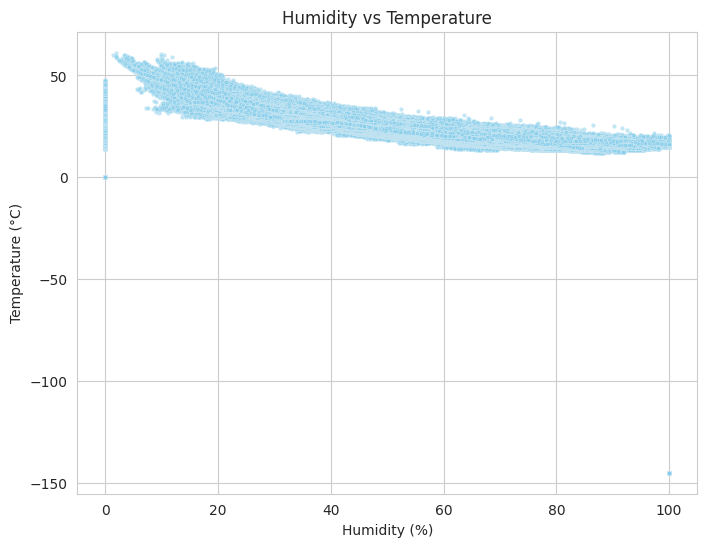

In [11]:
# Scatter plot to observe relationship
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.set_style("whitegrid")
sns.scatterplot(data=df, x='humidity', y='temperature', alpha=0.5, color='skyblue', s=10)
plt.title('Humidity vs Temperature')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

## Data Preprocessing

In [18]:
# Drop any rows with missing values
df = df.dropna()

In [19]:
# Define features and target
X = df[['humidity']]
y = df['temperature']

In [20]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 561238
Test set size: 140310


## Model Training

In [22]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 41.251744930219765
Coefficient: -0.3412206156871687


In [23]:
# Predict
y_pred = model.predict(X_test)

print("Predicted temperatures:", y_pred[:5])

Predicted temperatures: [14.93681105 32.06608596 18.21935337 23.49462409 28.31265918]


## Evaluation

In [25]:
# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared Score (R²)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R²): {r2:.4f}")


Mean Squared Error (MSE): 144.08
R-squared Score (R²): 0.2570


In [27]:
import pandas as pd

# Assuming X_test, y_test, and y_pred are already defined
results_df = pd.DataFrame({
    'Humidity': X_test['humidity'].values,
    'Actual Temperature': y_test.values,
    'Predicted Temperature': y_pred
})

# Export to Excel
results_df.to_excel("temperature_predictions.xlsx", index=False)
print("Excel file saved as 'temperature_predictions.xlsx'")


Excel file saved as 'temperature_predictions.xlsx'
